# 감성 인식(Sentiment Analysis)
- 문서의 주관적인 감성/의견/감정/기분 등을 파악하기 위한 방법으로 소셜 미디어, 여론조사, 온라인 리뷰, 피드백 등 다양한 분야에서 활용하고 있음.

## 지도 학습 기반의 분석
- 지도학습은 학습데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일

## 감성 어휘 사전을 이용한 분석
- 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단합니다. 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성(Sentiment) 수치를 계산하는 방법.


- SentiWordNet : NLTK 패키지의 WordNet과 유사하게 감성 단어 전용의 WordNet을 구현한 것. SentiWordNet은 Synset별로 3가지 감성 점수(sentiment score)를 할당. 감정 감성 지수, 부정 감정 지수, 객관성 지수가 그것. 긍정 감성 지수는 해당 단어가 감성적으로 얼마나 긍정적인가, 부정 지수는 얼마나 감성적으로 부정적인가를 수치로 나타낸 것. 객관성 지수는 긍정/부정 감성 지수와 완전히 반대되는 개념으로 단어가 감성과 관계없이 얼마나 객관적인지를 수치로 나타낸 것. 문장별로 단어들의 금정 감성 지수와 부정 감성 지수를 합산하여 최종 감성 지수를 계산하고 이에 기반해 감성이 긍정인지 부정인지를 결정.

- VADER : 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지. 뛰어난 감성 분석 결과를 제공하며, 비교적 빠른 수행시간을 보장해 대용량 텍스트 데이터에 잘 사용되는 패키지.

<img src = 'https://ontotext.fbk.eu/Images/position.png'>

- 감성 지수는 주관적, 객관적 지수로 분할
- 주관적 지수는 다시 긍정과 부정 지수로 분할

- Synset 객체를 활용.

참고 : https://bab2min.tistory.com/573#:~:text=SentiWordNet%EC%9D%84%20%EC%86%8C%EA%B0%9C%ED%95%A9%EB%8B%88%EB%8B%A4,%EB%A5%BC%20%EB%A7%A4%EA%B8%B4%20%EC%96%B4%ED%9C%98%EC%82%AC%EC%A0%84%EC%9E%85%EB%8B%88%EB%8B%A4.&text=%EB%A7%8C%EC%95%BD%20P%20%3D%201%EC%9D%B4%EB%A9%B4%20%EA%B7%B8,%EA%B0%95%EB%A0%AC%ED%95%98%EA%B2%8C%20%EB%B6%80%EC%A0%95%EC%A0%81%EC%9D%B8%20%EC%9D%98%EB%AF%B8%EA%B2%A0%EC%A7%80%EC%9A%94.


### SentiWordNet을 이용한 감성 분석
1. 문서(Document)를 문장(Setence)단위로 분해
2. 다시 문장을 단어(Word)단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synet객체와 senti_synset객체를 생성
4. senti_synset에서 감성/부정 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정


## VADER
- 소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon

- VADER는 SentimentlntenisityAnalayzer 클래스를 이용해 쉽게 감성 분석을 제공

- SentimentlntenisityAnalyzer 클래스를 이용해 쉽게 감성 분석을 제공

- SentimentIntensityAnalyzer 객체를 생성한 뒤에 문서별로 polarity_scores() 메서드를 호출해 감성 점수를 구한 뒤, 해당 문서의 감성 점수가 특정 임계값 이상이면 긍정, 그렇지 않으면 부정으로 판단.

- 'neg'는 부정 감성 지수, 'neu'는 중립적인 감성 지수, 'pos'는 긍정 감성 지수, 그리고 compound는 neg,neu,pos score를 적절히 조합해 -1에서 1사이의 감성 지수를 표현한 값.

- compound score를 기반으로 부정 감성 또는 감성 여부를 결정. 보통 0.1이상이면 긍정 감성, 그 이하면 부정감성으로 판단하나 상화에 따라서 이 임계값을 적절히 조절해 예측 성능을 조절




### IMDB의 영화 Review에 대한 긍정/부정 예측
Bag of Words Meets Bags of Popcorn(https://www.kaggle.com/c/word2vec-nlp-tutorial)


- labeledTrainData : 25,000 행의 리뷰의 id, sentiment,text가 포함된 레이블된 트레이닝 셋(sentiment는 긍정이면 1, 부정이면 0의 값을 가진다)

- testData : 25,000행의 리뷰의 id와 text 정보가 있다. 우리의 목표는 각 리뷰의 sentiment를 예측하는 것이다!(테스트 데이터이므로 되도록이면 이 파일은 모델을 짜기 전에 읽어보지 말자!)

- unlabledTrainData : 추가적인 트레이닝 셋으로 레이블이 없다. 50,000행의 id,text만 존재한다.

- sampleSusbmission : 정답이 어떤 형식으로 제출해야 되는지 알려주는 파일


- 평가 - ROC Curve

## Word Embedding

- 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자의 나열인 벡터로 바꾼 결과 혹은 그 과정 전체를 의미함.

- 임베딩의 가장 간단한 형태는 단어의 빈도를 그대로 벡터로 사용하는 것.

- 단어나 문장 각각을 벡터로 변환해 벡터 공간(Vector space)으로 끼워넣는다는 의미.
    - 가장 간단 형태의 임베딩은 단어의 빈도를 기준으로 벡터로 변환하는 것.


## Word2Vec이란?
- 자연어 텍스트를 분석해서 특정단어를 얼마나 사용했는지, 얼마나 자주 사용했는지, 어떤 종류의 텍스트인지 분류하거나 긍정인지 부정인지에 대한 감정분석, 그리고 어떤 내용인지 요약하는 정보를 얻을 수 있다.
- 감정분석은 머신러닝에서 어려운 주제로 풍자, 애매모호한 말, 반어법, 언어 유희로 표현을 하는데 이는 사람과 컴퓨터에게 모두 오해의 소지가 있다. 여기에서는 Word2Vec을 통한 감정분석을 해보는 튜토리얼을 해본다.
- Google의 Word2Vec은 단어의 의미와 관계를 이해하는 데 도움이 된다.
- 상당수의 NLP기능은 NLTK모듈에 구현되어 있는데 이 모듈은 코퍼스, 함수와 알고리즘으로 구성되어 있다.

##BOW(Bag of Words)


- 가장 간단하지만 효과적이라 널리 쓰이는 방법
- 장, 문단, 문장, 서식과 같은 입력 텍스트의 구조를 제외하고 각 단어가 이 말뭉치에 얼마나 많이 나타나는지만 헤어린다.
- 구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방(Bag)이라고 생각할 수 있다.
- BOW는 단어의 순서과 완전히 무시 된다는 단점이 있다. 예를 들어 의미가 완전히 반대인 두 문장이 있다고 하면,
It's bad, not good at all.
It's good, not bad at all.
- 위 두 문장은 의미가 전혀 반대지만 완전히 동일하게 반환된다.
- 이를 보완하기 위해 n-gram을 사용하는데 BOW는 하나의 토큰을 사용하지만 n-gram은 n개의 토큰을 사용할 수 있도록 한다.

NLP(자연어처리)는 텍스트 문제에 접근하기 위한 기술집합이다. 이 튜토리얼에서는 IMDb 영화 리뷰를 로딩하고 정제하고 간단한 BOW 모델을 적용하여 리뷰가 추천인지 아닌지에 대한 정확도를 예측한다.
Train 데이터의 텍스트를 바탕으로 Test 데이터의 Setiment을 예측
0이면 부정, 1이면 긍정

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/IMDB/labeledTrainData.tsv/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
test = pd.read_csv('/content/drive/MyDrive/IMDB/testData.tsv/testData.tsv', header=0,sep = '\t',quoting = 3)

# header = 0 : 파일의 첫 번째 줄에 열 이름이 있음을 나타낸다.
# delimiter = "\t" : \t는 필드가 tab으로 구분되는 것을 의미한다.
# quoting = 3 : 3은 텍스트의 쌍따옴표를 무시하도록 한다.

In [ ]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [ ]:
train.info()
# null value는 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [ ]:
train['sentiment'].value_counts()
# sentiment의 클래스가 딱 절반으로 되어있음을 알 수 있다. (부정, 긍정)

1    12500
0    12500
Name: sentiment, dtype: int64

In [ ]:
print(train['review'][:700]) ## review 컬럼을 700자 까지만 확인해본다.

0      "With all this stuff going down at the moment ...
1      "\"The Classic War of the Worlds\" by Timothy ...
2      "The film starts with a manager (Nicholas Bell...
3      "It must be assumed that those who praised thi...
4      "Superbly trashy and wondrously unpretentious ...
                             ...                        
695    "First let me say that I am not a Dukes fan, b...
696    "I like this presentation - I have read Bleak ...
697    "A somewhat typical bit of filmmaking from thi...
698    "This film breeches the fine line between sati...
699    "drss1942 really took the words right out of m...
Name: review, Length: 700, dtype: object


##데이터 정제 Data Cleaning and Text Preprocessing
- 기계가 텍스트를 이해할 수 있도록 텍스트를 정제해 준다.
- 신호와 소음을 구분한다. 아웃라이어 데이터로 인한 오버피팅을 방지한다.


1. BeatifulSoup을 통해 HTML태그를 제거
2. 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
3. NLTK 데이터를 사용해 불용어제거
4. 어간추출(Stemming)과 음소표기법(Lemmatizing)의 개념을 이해하고 어간을 추출



##정규화 normalization
- 한국어를 처리하는 예시 (입니닼ㅋㅋ -> 입니다 ㅋㅋ 등) ### 토큰화 tokenization
- 한국어를 처리하는 예시 (한국어 Noun, 를 Josa, 처리Noun, 하는 Adjective, 예시Noun)

In [ ]:
!pip install beautifulsoup4
!pip install html5lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


리뷰를 보면 태그가 섞여 있음을 알 수 있다.

- BeautifulSoup : BeautifulSoup은 HTML이나 XML에서 데이터를 추출하는 파이썬 라이브러리입니다. 웹문서의 구조를 찾아내는 파서를 이용해 찾고자 하는 데이터의 위치를 찾아 내어 값을 추출합니다.

- 크롤링에서 많이 씀

- 구문분석 한 뒤에 .get_text() 메소드를 이용하면 메소드를 이용하면 한글만 쏙 가져옴.
- html5lib는 HTML 문서를 트리구조로 분석해주는 라이브러리



In [ ]:
from bs4 import BeautifulSoup
example = BeautifulSoup(train['review'][0],'html5lib')
print(train['review'][0][:700])
example.get_text()

# BeautifulSoup을 불러와서 review를 확인한다.
# 그냥 print 한것과 exam으로 불러온 텍스트를 비교해보면
# <br \>과 같은 html 태그들이 사라진 것을 볼 수있다.

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 2

In [ ]:
#정규 표현식 사용
import re

#소문자와 대문자가 아닌 것은 공백으로 대체
# [^ 문자] : 문자를 제외하라는 정규표현식 ^은  not 의미
letters_only = re.sub('[^a-zA-Z]',' ',example.get_text())
letters_only

# re를 불러와서 정규표현식으로 특수문자를 제거한다.
# 소문자와 대문자가 아닌 것은 공백으로 대체한다 (re.sub("바꿔야할것", "바꾸고싶은것"))
# output을 보면 특수문자들이 전부 공백으로 대체된 것을 볼 수 있다.

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

- 토큰화

In [ ]:
lower_case = letters_only.lower()

words = lower_case.split()
print(words)

# letters_only를 전부 소문자로 대체해준다.
# split을 사용하여 단어단위로 나눈다. (토큰화)
# 437개의 토큰으로 이루어져 있다.

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

### 불용어 제거 (Stopword Removal)
- 일반적으로 코퍼스에서 자주 나타나는 단어는 학습 모델로서 학습이나 예측 프로세스에 실제로 기여하지 않아 다른 텍스트와 구별하지 못한다.
- 예를들어 조사, 접미사, i, me, it, this, that, is, are 등 같은 단어는 빈번하게 등장하지만 실제 의미를 찾는데 큰 기여를 하지 않는다.
- Stopwords는 "to" 또는 "the"와 같은 용어를 포함하므로 사전 처리 단계에서 제거하는 것이 좋다.
- NLTK에는 153개의 영어 불용어가 미리 정의되어 있다.
- 17개의 언어에 대해 정의되어 있으며 한국어는 없다.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

# words에 담겨져 있던 단어에 Stopwords가 있다면 제거한다.
# 제거한 토큰들을 확인한다.
# 토큰이 437개에서 219개로 줄어들었음을 알 수 있다.

219


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

# 어간 추출

- 텍스트들의 핵심만 나타낼 수 있게 단어 핵심인 어간만 추출

- 어간 추출은 어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해내는 것
- "message", "messages", "messaging"과 같이 복수형, 진행형 등의 문자를 같은 의미의 단어로 다룰 수 있도록 도와준다.
- stemming(형태소 분석): 여기에서는 NLTK에서 제공하는 형태소 분석기를 사용한다. 여러가지 stemmer들이 있는데, 포커 형태소 분석기는 보수적이고 랭커스터 형태소 분석기는 좀 더 적극적이다.
- 형태소 분석 규칙의 적극성 때문에 랭커스터 형태소 분석기는 더 많은 동음이의어 형태소를 생산한다.

In [ ]:
# 포터 스태머의 사용 예시

stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem("maximum"))
print("The stemmed form of running is : {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("Tje stemmed form of run is: {}".format(stemmer.stem("run")))

# maximum이 그대로 출력된다.
# run의 변형어들은 run으로 어간이 추출된다.

maximum
The stemmed form of running is : run
The stemmed form of runs is: run
Tje stemmed form of run is: run


In [ ]:
# 랭커스터 스태머의 사용 예시

from nltk.stem.lancaster import LancasterStemmer

lanc_stemmer = LancasterStemmer()
print(lanc_stemmer.stem("maximum"))
print("The stemmed form of running is : {}".format(lanc_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lanc_stemmer.stem("runs")))
print("Tje stemmed form of run is: {}".format(lanc_stemmer.stem("run")))

# maximum의 어간이 maxim으로 추출된다.
# run의 변형어들은 마찬가지로 run으로 어간이 추출된다.

maxim
The stemmed form of running is : run
The stemmed form of runs is: run
Tje stemmed form of run is: run


In [ ]:
words[:10]

# 처리하기 전 단어들을 확인해본다.
# going, started 등 변형된 단어가 있음을 알 수 있다.

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [ ]:
#스노우볼 스테머 사용
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
#words에 단어 있는 단어 스테머
words = [stemmer.stem(w) for w in words]
words

# going, started등 어간이 잘 추출된 것을 확인할 수 있다.

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari',
 'watch',
 'wiz',
 'watch',
 'moonwalk',
 'mayb',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'realli',
 'cool',
 'eighti',
 'mayb',
 'make',
 'mind',
 'whether',
 'guilti',
 'innoc',
 'moonwalk',
 'part',
 'biographi',
 'part',
 'featur',
 'film',
 'rememb',
 'go',
 'see',
 'cinema',
 'origin',
 'releas',
 'subtl',
 'messag',
 'mj',
 'feel',
 'toward',
 'press',
 'also',
 'obvious',
 'messag',
 'drug',
 'bad',
 'kay',
 'visual',
 'impress',
 'cours',
 'michael',
 'jackson',
 'unless',
 'remot',
 'like',
 'mj',
 'anyway',
 'go',
 'hate',
 'find',
 'bore',
 'may',
 'call',
 'mj',
 'egotist',
 'consent',
 'make',
 'movi',
 'mj',
 'fan',
 'would',
 'say',
 'made',
 'fan',
 'true',
 'realli',
 'nice',
 'actual',
 'featur',
 'film',
 'bit',
 'final',
 'start',
 'minut',
 'exclud',
 'smooth',
 'crimin',
 'sequenc',
 'joe',
 'pesci',
 'convinc',
 'psychopath',
 'power',
 'drug

## Lemmatization (음소표기법)
- 언어학에서 음소표기법은 단어의 보조 정리 또는 사전 형식에 의해 식별되는 단일 항목으로 분석 될 수 있도록 굴절 된 형태의 단어를 그룹화하는 과정이다. 예를 들어 동음이의어가 문맥에 따라 다른 의미를 갖는데,

1. 배가 맛있다.
2. 배를 타는것이 재미있다.
3. 평소보다 두 배로 많이 먹어서 배가 아프다.

- 위에 있는 3개의 문장에 있는 "배"는 모두 다른 의미를 갖는다.

- Lemmatization은 이 때 앞뒤 문맥을 보고 단어의 의미를 식별하는 것이다.
영어에서 meet는 meeting으로 쓰였을 때 회의를 뜻하지만 meet일 때는 만나다는 뜻을 갖는데, 그 단어가 명사로 쓰였는지 동사로 쓰였는지에 따라 적합한 의미를 갖도록 추출하는 것이다.¶

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wordnet_lem = WordNetLemmatizer()

print(wordnet_lem.lemmatize("fly"))
print(wordnet_lem.lemmatize("flies"))

words = [wordnet_lem.lemmatize(w) for w in words]

words[:10]

# lemmatizer를 사용하여 fly, flies를 처리하면 둘 다 fly로 바뀐다.
# words를 lemmatization 처리한 후 결과를 확인해본다.
# stemming한 결과와 마찬가지로 출력된다.

[nltk_data] Downloading package wordnet to /root/nltk_data...


LookupError: ignored

# 문자열 처리

In [ ]:
import re
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, "html.parser").get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return(" ".join(stemming_words))

# 0. def로 함수 선언
# 1. HTML 제거
# 2. 영문자가 아닌 문자는 공백으로 변환
# 3. 소문자로 전체 변환
# 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다. stopwods를 세트로 변환
# 5. Stopwords 불용어 제거
# 6. Stemming으로 어간추출
# 7. 공백으로 구분된 문자열로 결합하여 결과 반환

In [ ]:
clean_review = review_to_words(train["review"][0])
clean_review

# review 데이터의 첫번째 데이터를 함수에 넣고 실행해본다.
# review 문장들이 토큰화되어 깔끔하게 처리되었음을 확인한다.

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [ ]:
num_reviews = train["review"].size
num_reviews

25000

In [ ]:
# 적용시간이 오래걸리는 문제로 인해 multiprocessing을 사용하여 함수를 적용시켜준다.
# multiprocessing을 사용하면 복잡하고 오래걸리는 작업을 별도의 프로세스를 생성 후
# 병렬처리해서 보다 빠른 응답처리 속도를 기대할 수 있는 장점이 있다.
# 출처: https://gist.github.com/yong27/7869662

from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라미터를 꺼냄
    workers = kwargs.pop("workers")
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes = workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠서 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
                                 for d in np.array_split(df, workers)])
    pool.close()
    #작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [ ]:
%time
clean_train_reviews = apply_by_multiprocessing(train["review"],review_to_words, workers = 4)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [ ]:
clean_train_reviews[0]

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [ ]:
%time
clean_test_reviews = apply_by_multiprocessing(test["review"],review_to_words, workers = 4)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 10.3 µs


# 비지도학습 기반 감성 분석
## SentiWordNet을 이용한 Sentiment Analysis
 - WordNet Synset과 SentiWordNet SentiSynset 클래스

In [ ]:
import nltk
nltk.download('all')

In [ ]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성.
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 갯수:', len(synsets))
print('synsets() 반환 값 :', synsets)

In [ ]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemmas:',synset.lemma_names())

In [ ]:
# synset 객체를 단어별로 생성합니다.
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정합니다.
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장합니다.
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

In [ ]:
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0

    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:

            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성.
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산.
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1

    if not tokens_count:
        return 0

    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1

    return 0

In [ ]:
review_df = train.copy()
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
print('#### SentiWordNet 예측 성능 평가 ####')
get_clf_eval(y_target, preds)

### VADER lexicon을 이용한 Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

In [ ]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)

    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print('#### VADER 예측 성능 평가 ####')
get_clf_eval(y_target, vader_preds)

In [ ]:
print('#### VADER 예측 성능 평가 ####')
get_clf_eval(y_target, vader_preds)

##워드 클라우드
- 단어의 빈도 수 데이터를 가지고 있을 때 이용할 수 있는 시각화 방법
단순히 빈도 수를 표현하기 보다는 상관관계나 유사도 등으로 배치하는 게 더 의미 있기 때문에 큰 정보를 얻기는 어렵다.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = "black", width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
displayWordCloud(" ".join(clean_train_reviews))

In [ ]:
train["num_words"] = clean_train_reviews.apply(lambda x : len(str(x).split()))
train["num_uniq_words"] = clean_train_reviews.apply(lambda x: len(set(str(x).split())))

# 단어 개수 컬럼 생성
# 중복을 제거한 unique 단어 개수 컬럼 생성

In [ ]:
x = clean_train_reviews[0]
x = str(x).split()
print(len(x))
x[:10]

# 첫 번째 리뷰의 단어를 세어보면 219개이다.

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(ncols = 2, figsize = (18, 6))
print("리뷰별 단어 평균 값: ", train["num_words"].mean())
print("리뷰별 단어 중간 값: ", train["num_words"].median())
sns.distplot(train["num_words"], bins = 100, ax = ax[0])
ax[0].axvline(train["num_words"].median(), linestyle = "dashed")
ax[0].set_title("리뷰별 단어 수 분포")

print("리뷰별 고유 단어 평균 값: ", train["num_uniq_words"].mean())
print("리뷰별 고유 단어 중간 값: ", train["num_uniq_words"].median())
sns.distplot(train["num_uniq_words"], bins = 100, color = "g", ax = ax[1])
ax[1].axvline(train["num_uniq_words"].median(), linestyle = "dashed")
ax[1].set_title("리뷰별 고유 단어 수 분포")

## Bag-of-words model
텍스트 데이터 벡터화
다음의 두 문장이 있다고 하자,
John likes to watch movies. Mary likes movies too.
John also likes to watch football games.
위 두 문장을 토큰화하여 가방에 담아주면 다음과 같다.

[ "John", "likes", "to", "watch", "movies", "Mary", "too", "also", "football", "games" ]

그리고 배열의 순서대로 가방에서 각 토큰이 몇 번 등장하는지 횟수를 세어준다.

(1) [1,2,1,1,2,1,1,0,0,0]

(2) [1,1,1,1,0,0,0,1,1,1]

=> 머신러닝 알고리즘이 이해할 수 있는 형태로 바꿔주는 작업이다.


단어 가방을 n-gram을 사용해 bigram으로 담아주면 다음과 같다.


[ "John likes", "likes to", "to watch", "watch movies", "Mary likes", "likes movies", "movies too" ]

=> 여기에서는 CountVectorizer를 통해 위 작업을 한다.


Sklearn의 CountVectorizer를 통해 피처 생성
정규표현식을 사용해 토큰을 추출한다.
모두 소문자로 변환시키기 때문에 good, Good, gOOd이 모두 같은 특성이 된다.
의미없는 특성을 많이 생성하기 때문에 적어도 두 개의 문서에 나타난 토큰만을 사용한다.
min_df로 토큰이 나타날 최소 문서 개수를 지정할 수 있다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라미터 값을 수정
# 파라미터 값만 수정해도 리더보드 스코어 차이가 큼
vectorizer = CountVectorizer(analyzer = "word",
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            min_df = 2, # 토큰이 나타날 최소 문서 개수
                            ngram_range = (1, 3), # 유니그램, 바이그램 등
                            max_features = 20000 # 최대 피쳐의 개수
                            )
vectorizer

In [ ]:
# 속도 개선을 위해 파이프라인을 사용하도록 개선

pipeline = Pipeline([
    ("vect", vectorizer),
])

In [ ]:
%time
train_data_features = pipeline.fit_transform(clean_train_reviews)

train_data_features

In [ ]:
train_data_features.shape

# 25000의 관측치와 위에서 지정해주었던 20000개의 feature로 이루어져 있음.

In [ ]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

# feature의 이름 (단어)를 확인

In [ ]:
dist = np.sum(train_data_features, axis = 0)

for tag, count in zip(vocab, dist):
    print(count, tag)

pd.DataFrame(dist, columns = vocab)

# 단어를 count해줘서 한번에 확인

In [ ]:
pd.DataFrame(train_data_features[:10].toarray(), columns = vocab).head()

# 각각의 row가 어떤 단어를 포함하고 있는지 확인하기 위함

# RandomForest로 예측해보기

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs =1)
model

In [ ]:
%time

model = model.fit(train_data_features, train["sentiment"])

In [ ]:
from sklearn.model_selection import cross_val_score
%time
score = np.mean(cross_val_score(model, train_data_features,train["sentiment"], cv = 10,scoring = "roc_auc"))

In [ ]:
clean_test_reviews[0]

In [ ]:
%time
test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# test 데이터도 똑같이 파이프라인을 사용하여 벡터화 시켜준다.

In [ ]:
test_data_features

In [ ]:
# 벡터화하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
# vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

In [ ]:
y_pred = model.predict(test_data_features)
y_pred[:10]

# 토픽 모델링

알고리즘 유형

- LSA(Latent SemanticAnalysis,), pLSA
- LDA(Latent Dirichlet Allocation)
- NMF(Non Negative Factorization)


LSA와 NMF는 행렬 분해 기반 토픽 모델링

pLSA와 LDA 확률 기반의 토픽 모델링


##토픽 모델링알고리즘의 2개의 가정
1. 개별 문서는 혼합된 여러 개의 주제로 구성되어 있다.
2. 개별 주제는 여러 개의 단어로 구성되어 있다.

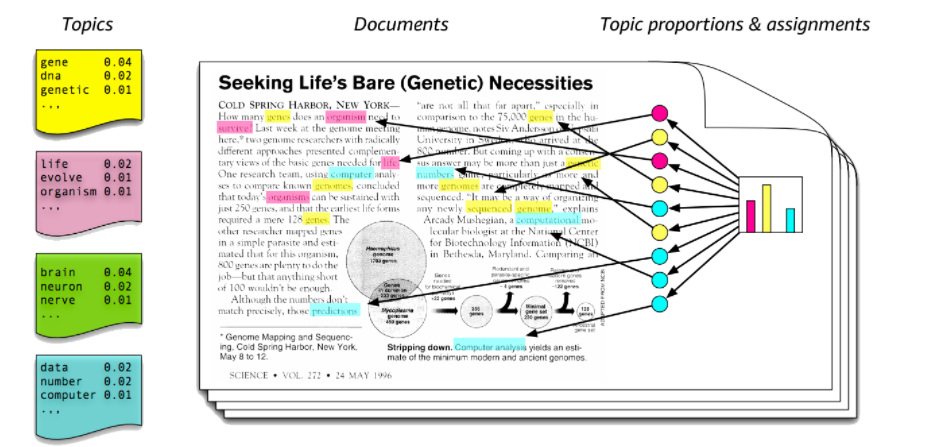

-BoW에 기반한 DTM이나 TF-IDF는 기본적으로 단어의 빈도 수를 이용한 수치화 방법이기 때문에 단어의 의미를 고려하지 못한다는 단점이 있었습니다. (이를 토픽 모델링 관점에서는 단어의 토픽을 고려하지 못한다고도 합니다.) 이를 위한 대안으로 DTM의 잠재된(Latent) 의미를 이끌어내는 방법으로 잠재 의미 분석(Latent Semantic Analysis, LSA)이라는 방법이 있습니다. 잠재 의미 분석(Latent Semantic Indexing, LSI)이라고 부르기도 합니다. 이하 LSA라고 명명하겠습니다.

- 토픽 모델링은 문서들에 잠재되어 있는 공통된 토픽(주제)들을 추출해 내는 기법.

- 공통된 유사성을 도출한다는 측면에서 문서 군집화/유사도와 비슷한 기법 일 수 있지만, 토픽 모델링은 문서들이 가지는 주요 토픽의 분포도와 개별 토픽이 어떤 의미인지(단어들의 분포)를 제공하는 특징을 가지고 있음.

## 잠재 의미 분석(Latent Semantic Analysis,LSA)
- LSA는 SVD를 활용하여 문서에 숨어있는 의미를 이끌어내기 위한 방법.

### Truncated SVD
- LSA의 경우 Full SVD에서 나온 3개의 행렬에서 일부 벡터들을 삭제시킨 절단된 SVD(truncated SVD) 를 사용함.

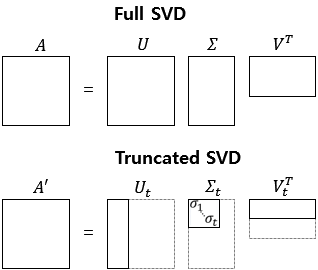

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbs4vPZ%2FbtqB0fnIaUX%2FNxARkhmYl7HKHuXKW7ryx1%2Fimg.png'>



# 특이값 분해(Singluard Value Decompostion)의 개념과 의미


##고유값 분해의 정의
 - 고유값 분해(eigen decomposition)는 고유값 과 고유벡터로 부터 유도되는 고유값 행렬과 고유벡터 행렬에 의해 분해될수있는 행렬의 표현이다.

 -  n*n 정방행렬 (n by n square matrix)에 대해서만 적용 가능

<img src = 'https://t1.daumcdn.net/cfile/tistory/2676AB4B571829E109'>


### 닮음(Similar)
- 정의 1) 행렬에서 닮음(Similar) 는  $P^{-1}AP = B$를 만족하는 가역행렬( invertible matrix) P가 존재할때, 정사각행렬 A와 B는 서로 닮음이라고 표현.
- 정의 2) 정방행렬 A가 어떠한 대각행렬과 닮았으면, 즉 $P^{-1}AP = B$이 대각행렬이 되는 가역 행렬(Inverse) P가 존재하면 대각화가능(diagonalizable)하다고 한다. 이 경우에 행렬 P는 A를 대각화한다(diagonalize)고 한다.

- 더 나아가, $P^{T}AP = B$ 를 만족하면 직교행렬 $P$가 존재할 때, B는 A에 직교 닮음(Othognally similar)라고 함.



### 스펙트럼 분해(Spectral decompostion)
$P{\times}P$ 대칭행렬 A에 대한 스펙트럼 분해(Spectral decomposition)는 아래와 식과 같다. $P{\times}P$ 대칭행렬 A는 직교 행렬 $P$에 의해 대각화(diagonalization)된다고 한다.

$~~~~~~~A = P {\wedge} P^T = {\sum_{i=1}^p} {\lambda_i}~e_i~e_i^T$


이때 $PP^T = P^TP = I$를 만족하는 직교행렬 $P$는 $P = [e_1,\cdots,e_p]$로 이루어지며, ${\wedge}$는 ${\wedge}$는 A의 고유값(eigenvalue) 들로만 이루어진 대각 행렬(diagonal matrix)

<img src = 'https://lh3.googleusercontent.com/proxy/OFMdOWTh_l3sT_GwG0RDF_P3PeU7e5hsJT4Eifm0uylNurocr5TodPHekhMKlgCs0_KMOLuCBzXw20i3EV2HrSN9Bw'>

대각 행렬  ${\wedge}$ 는 $P^TAP = {\wedge}$


참고 : 공돌이의 수학노트(https://seoncheolpark.github.io/book/_book/2-4-matrix-decomposition.html)
# 특이값 분해(SVD)

- 특이값분해(Singular Value Decomposition,SVD)는 $m{\times}n$ 직사각형 행렬 $A$에 대해 스펙트럼 분해를 일반화 한것.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~A = U {\sum}{V}^T$

이 때,
- $U : A$의 left singular vector로 이루어진 $m{\times}m$ 직교 행렬(orthogonal matrix)

- ${\sum}$ : 주 대각성분이 ${\sqrt{\lambda_i}}$로 이루어진 $m{\times}n$ 직사각 대각행렬(diagonal matrix)

- $V$ : A의 right singluar vector로 이루어진 $n{\times}n$ 직교행렬(Orthogonal matrix)

행렬 A의 계수(rank)가 $k$라고 할때

- $U = [u_1,\cdots,u_k,\cdots,u_m]$ 는 $AA^T$를 고유값 분해(eigenvalue decompostition)로 직교대각화하여 얻은 $m{\times}m$ 직교행렬(orthogonal matrix)이며, 특히 $[u_1,\cdots,u_k]$ 를 좌 특이벡터(left singular vector)라고 함.

- $V =[v_1,\cdots,v_k,\cdots,v_n]$는 $A^TA$를 고유값분해로 직교대각화하여 얻은 $n{\times}n$ 직교행렬이며, 특히 $[v_1,v_2,\cdots,v_k]$를 우특이행렬(right signular vector)라고 한다.

- ${\sum}$는 $A^TA$의 0이 아닌 고유값이 ${\lambda_1},{\lambda_2},\cdots,{\lambda_k} 일 때, {\sqrt{\lambda_1}},{\sqrt{\lambda_2}},\cdots,{\sqrt{\lambda_k}}$ 를 대각성분을 가지고 나머지 성분을 0으로 갖는  $m{\times}n$ 직사각 대각 행렬이다(
Rectangular Orthogonal matirx)

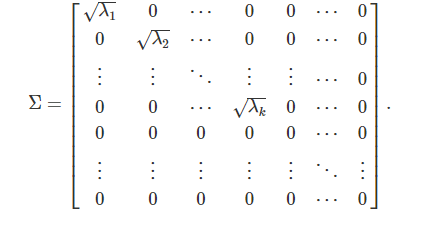

A를 다시 쓰면




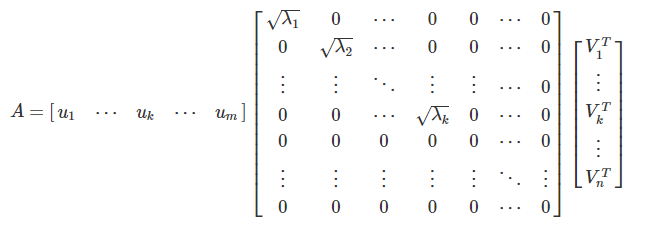


위 식에서 특이값(singular matrix)는 ${\sigma_i}^2 = {\lambda_i}$로 부터 ${\sigma_i} = {\sqrt{\lambda_i}}$가 됨.

참고) $U,V$가 직교행렬이면, $UU^T = I, VV^T = I$가 성립.

## 특이값분해와 고유값 분해의 관계

$m{\times}n$ 행렬 $A$의 특이값분해 $U$는 $AA^T$의 고유벡터이고, $V$는 $AA^T$의 고유벡터이며,$A$의 0이 아닌 특이값들의 제곱 ${\sum}{\sum}^T,{\sum}^T{\sum}$는 $AA^T,A^TA$의 고유값과 같음을 알 수 있다.

참고) ${\sigma_i} = {\sqrt {\lambda_i}}$이므로 ${\sum}{\sum}^T$ 또는 ${\sum}^T{\sum} = {\lambda_i}$

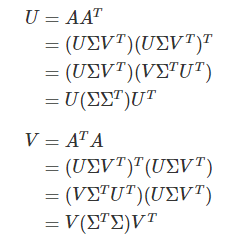

즉, $u_1,u_2,\cdots,u_k,\cdots,u_m$는 $range(A)$의 직교정규벡터,$v_1,\cdots,v_k,\cdots,v_n$는 $N(A)^{\perp}$의 직교정규벡터.

n개의 문서에 포함된 중복을 제거한 단어의 총개수가 m 개라고 합시다 이를 기반으로 문서-단어 행렬(DTM)인 A를 만든다면, m x n의 크기를 갖는 행렬 A가 됩니다. A를 특이값 분해하면 U ${\sum} V_t$ 가 됩니다. 이때 ${\sum}$는 총 r개의 특이값을 갖습니다. 사용자가 r보다 작은 k를 설정하고, k만큼의 특이값만 남기고 k x k 크기를 갖는 ∑k를 만듭니다. 특이값 분해를 하면 ${\sum}$의 대각 원소는 크기 순으로 정렬이 되기 때문에, k개만 남기고 잘라주면 가장 중요한 특이값 k개만 남게 됩니다. 이와 대응되게 U와 $V_t$행렬에 대해서도 k개만 남기고 m x k크기를 갖는 $U_k$와 k x n크기를 갖는 $V_k^t$를 만들어 줍니다. k만큼만 남기고 잘라내었다는 것은 중요한 토픽만 남기고 불필요한 토픽은 제거한다는 의미입니다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkKCM7%2FbtqB0gfNhvt%2Fk61nS6vgmRpmUISQv1k6G1%2Fimg.png'>


이렇게 만든 Ak에는 중요한 토픽만 남게 됩니다. A 행렬의 크기도 m x n이고, $A_k$ 행렬의 크기도 m x n으로 동일하지만, A 행렬에는 불필요한 토픽이 많이 포함되어 있고, $A_k$ 행렬에는 불필요한 토픽은 제거된 상태, 즉 문서의 잠재 의미(주요 주제, 중요 단어)만 남아 있는 상태입니다.


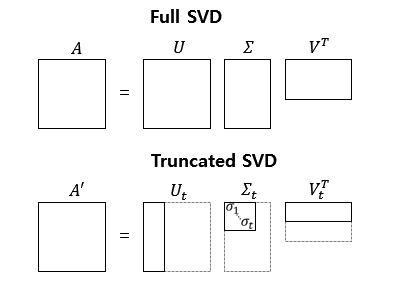

절단된 SVD는 대각 행렬 Σ의 대각 원소의 값 중에서 상위값 t개만 남게 됩니다. 절단된 SVD를 수행하면 값의 손실이 일어나므로 기존의 행렬 A를 복구할 수 없습니다. 또한, U행렬과 V행렬의 t열까지만 남깁니다. 여기서 t는 우리가 찾고자하는 토픽의 수를 반영한 하이퍼파라미터값입니다. 하이퍼파라미터란 사용자가 직접 값을 선택하며 성능에 영향을 주는 매개변수를 말합니다. t를 선택하는 것은 쉽지 않은 일입니다. t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 가져갈 수 있지만, t를 작게 잡아야만 노이즈를 제거할 수 있기 때문

# 잠재 의미 분석(Latent Semantic Analysis,LSA)

실습


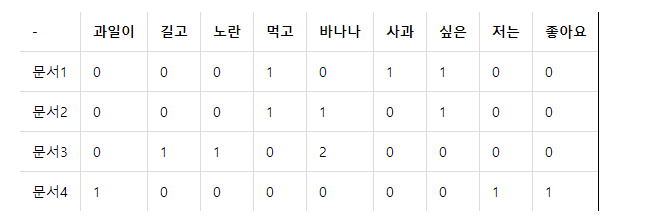

In [ ]:
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
np.shape(A)

4 × 9의 크기를 가지는 DTM이 생성되었습니다. 이에 대해서 풀 SVD(full SVD)를 수행해보겠습니다. 단, 여기서는 대각 행렬의 변수명을 Σ가 아니라 S를 사용합니다. 또한 V의 전치 행렬을 VT라고 하겠습니다.

In [ ]:
U, s, VT = np.linalg.svd(A, full_matrices = True)

In [ ]:
print(U.round(2))
np.shape(U)

4 × 4의 크기를 가지는 직교 행렬 U가 생성되었습니다. 이제 대각 행렬 S를 확인해봅시다.

In [ ]:
print(s.round(2))
np.shape(s)

Numpy의 linalg.svd()는 특이값 분해의 결과로 대각 행렬이 아니라 특이값의 리스트를 반환합니다. 그러므로 앞서 본 수식의 형식으로 보려면 이를 다시 대각 행렬로 바꾸어 주어야 합니다. 우선 특이값을 s에 저장하고 대각 행렬 크기의 행렬을 생성한 후에 그 행렬에 특이값을 삽입해도록 하겠습니다.

In [ ]:
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
print(S.round(2))
np.shape(S)

4 × 9의 크기를 가지는 대각 행렬 S가 생성되었습니다. 2.69 > 2.05 > 1.73 > 0.77 순으로 값이 내림차순을 보이는 것을 확인할 수 있습니다.

In [ ]:
print(VT.round(2))
np.shape(VT)

 9× 9의 크기를 가지는 직교 행렬 VT(V의 전치 행렬)가 생성되었습니다. 즉, U × S × VT를 하면 기존의 행렬 A가 나와야 합니다. Numpy의 allclose()는 2개의 행렬이 동일하면 True를 리턴합니다. 이를 사용하여 정말로 기존의 행렬 A와 동일한지 확인해보겠습니

In [ ]:
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))
#allclose : 2개의 행렬이 동일하면 True를 리턴한다.

지금까지 수행한 것은 풀 SVD(Full SVD)입니다. 이제 t를 정하고, 절단된 SVD(Truncated SVD)를 수행해보도록 합시다. 여기서는 t=2로 하겠습니다. 우선 대각 행렬 S 내의 특이값 중에서 상위 2개만 남기고 제거해보도록 하겠습니다.

In [ ]:
S=S[:2,:2]
print(S.round(2))

상위 2개의 값만 남기고 나머지는 모두 제거된 것을 볼 수 있습니다. 이제 직교 행렬 U에 대해서도 2개의 열만 남기고 제거합니다.

In [ ]:
U=U[:,:2]
print(U.round(2))

2개의 열만 남기고 모두 제거가 된 것을 볼 수 있습니다. 이제 행렬 V의 전치 행렬인 VT에 대해서 2개의 행만 남기고 제거합니다. 이는 V관점에서는 2개의 열만 남기고 제거한 것이 됩니다.

In [ ]:
VT=VT[:2,:]
print(VT.round(2))

이제 축소된 행렬 U, S, VT에 대해서 다시 U × S × VT연산을 하면 기존의 A와는 다른 결과가 나오게 됩니다. 값이 손실되었기 때문에 이 세 개의 행렬로는 이제 기존의 A행렬을 복구할 수 없습니다. U × S × VT연산을 해서 나오는 값을 A_prime이라 하고 기존의 행렬 A와 값을 비교해보도록 하겠습니다.

In [ ]:
A_prime=np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

대체적으로 기존에 0인 값들은 0에 가가운 값이 나오고, 1인 값들은 1에 가까운 값이 나오는 것을 볼 수 있습니다. 또한 값이 제대로 복구되지 않은 구간도 존재해보입니다. 이제 이렇게 차원이 축소된 U, S, VT의 크기가 어떤 의미를 가지고 있는지 알아봅시다.

축소된 U는 4 × 2의 크기를 가지는데, 이는 잘 생각해보면 문서의 개수 × 토픽의 수 t의 크기입니다. 단어의 개수인 9는 유지되지 않는데 문서의 개수인 4의 크기가 유지되었으니 4개의 문서 각각을 2개의 값으로 표현하고 있습니다. 즉, U의 각 행은 잠재 의미를 표현하기 위한 수치화 된 각각의 문서 벡터라고 볼 수 있습니다. 축소된 VT는 2 × 9의 크기를 가지는데, 이는 잘 생각해보면 토픽의 수 t × 단어의 개수의 크기입니다. VT의 각 열은 잠재 의미를 표현하기 위해 수치화된 각각의 단어 벡터라고 볼 수 있습니다.

이 문서 벡터들과 단어 벡터들을 통해 다른 문서의 유사도, 다른 단어의 유사도, 단어(쿼리)로부터 문서의 유사도를 구하는 것들이 가능해집니다.


## 뉴스 데이터로 실습

사이킷런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터를 제공합니다. 앞서 언급했듯이 LSA가 토픽 모델링에 최적화 된 알고리즘은 아니지만, 토픽 모델링이라는 분야의 시초가 되는 알고리즘입니다. 여기서는 LSA를 사용해서 문서의 수를 원하는 토픽의 수로 압축한 뒤에 각 토픽당 가장 중요한 단어 5개를 출력하는 실습으로 토픽 모델링을 수행합니다.

- 뉴스그룹 데이터는 뉴스 데이터가 아닙니다.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

In [ ]:
dataset.target_names

서로 다른 20개의 토픽을 보여줍니다.

LSA를 하기 전에 데이터 전처리부터 해보겠습니다. 정규 표현식을 이용해 알파벳 이외의 문자는 제거해주고, 길이가 3 이하인 문자도 제거하겠습니다. 그리고 대소문자의 구분을 없애기 위해 모두 소문자로 바꿔보겠습니다.

In [ ]:
news_df = pd.DataFrame({'document': documents})

# 알파벳 이외의 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# 길이가 3이하인 문자 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

# 소문자로 바꾸기
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

그다음 문서 데이터에 대해 TF-IDF 벡터화를 해보겠습니다. max_features = 1000은 1,000의 단어까지만 벡터화를 하겠다는 뜻입니다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
max_features= 1000, # 1,000개의 단어만 추출
max_df = 0.5,
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # DTM의 행렬 크기 반환

총 11,314개의 문서에서 1,000개의 단어만 활용하여 문서-단어 행렬(DTM)을 만들었습니다. 다음으로 Truncated SVD를 활용하여 토픽 모델링을 해보겠습니다. 뉴스 토픽이 총 20개이므로 n_components는 20으로 설정했습니다. 이는 Truncated SVD 분해를 할 때, 상위 20개의 특이값만 사용하겠다는 뜻입니다.

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

svd_model.components_.shape

이는 Vt 행렬의 크기가 20 x 1000이라는 뜻입니다. singular_values_를 통해 20개의 특이값을 알아볼 수 있습니다.

In [ ]:
svd_model.singular_values_

크기 순으로 20개의 특이값이 나열된 것을 볼 수 있습니다. 훈련이 된 vectorizer에 get_feature_names() 명령어를 취해주면 1000개의 단어 피처 값을 받아올 수 있습니다.

In [ ]:
terms = vectorizer.get_feature_names()
len(terms)

terms의 길이는 총 단어 피처 수인 1000이 됨을 볼 수 있습니다. 마지막으로 20개의 토픽에 대해 주요 단어를 나열해보겠습니다.

In [ ]:
n = 8
components = svd_model.components_
for index, topic in enumerate(components):
    print('Topic %d: '%(index + 1), [terms[i] for i in topic.argsort()[: -n - 1: -1]])

불용어가 일부 포함이 되어 있네요. nltk를 활용해 불용어를 제거한 뒤 토픽 모델링을 하면 결과가 더 좋을 것입니다. Topic 3을 보면 game, team, season, players라는 단어가 있습니다. Topic 3는 스포츠와 관련된 기사일 것입니다. Topic 18을 보면 window, problem, space, work, server라는 단어가 있습니다. 이는 컴퓨터와 관련된 기사일 것입니다. 불용어를 제거하면 더 정확한 결과가 나올 수 있겠네요.

### LSA의 장점과 단점
지금까지 잠재 의미 분석(LSA)에 대해 알아봤습니다. LSA는 쉽고 빠르게 구현이 가능합니다. 하지만 문서에 포함된 단어가 가우시안 분포를 따라야만 LSA를 적용할 수 있습니다. 일반적으로 가우시안 분포를 따르겠지만 모든 문서의 단어가 가우시안 분포를 따르는 것은 아니기 때문에 적용하기가 힘들 때도 있습니다. 또한 문서가 업데이트가 된다면 처음부터 다시 SVD를 적용해줘야 하므로 자원이 많이 소모됩니다.

# 잠재 디리클레 할당(Latent Dirichlet Allocation,LDA)
- 토픽 모델링은 문서의 집합에서 토픽을 찾아내는 프로세스를 말합니다.
- 관찰된 무서내 단어들을 이용하여 베이즈 추론을 통해 잠재된 문서내 토픽 분포와 단어 분포를 추론하는 방식.

- 이 때 베이즈 추론의 사전 확률분포로 사용되는 것이 디리클레 분포(Dirichlet Distribution)

-이는 검색 엔진, 고객 민원 시스템 등과 같이 문서의 주제를 알아내는 일이 중요한 곳에서 사용됩니다. 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)은 토픽 모델링의 대표적인 알고리즘입니다. 줄여서 LDA라고 합니다.

- LDA는 문서들은 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정합니다. 데이터가 주어지면, LDA는 문서가 생성되던 과정을 역추적합니다.

## 개요

우선 LDA의 내부 메커니즘에 대해서 이해하기 전에, LDA를 일종의 블랙 박스로 보고 LDA에 문서 집합을 입력하면, 어떤 결과를 보여주는지 간소화 된 예를 들어 보겠습니다. 아래와 같은 3개의 문서가 있다고 합시다. 지금의 예제는 간단해서 눈으로도 토픽 모델링을 할 수 있을 것 같지만, 실제 수십만개 이상의 문서가 있는 경우는 직접 토픽을 찾아내는 것이 어렵기 때문에 LDA의 도움이 필요합니다.

문서1 : 저는 사과랑 바나나를 먹어요

문서2 : 우리는 귀여운 강아지가 좋아요

문서3 : 저의 깜찍하고 귀여운 강아지가 바나나를 먹어요


LDA를 수행할 때 문서 집합에서 토픽이 몇 개가 존재할지 가정하는 것은 사용자가 해야 할 일입니다. 여기서는 LDA에 2개의 토픽을 찾으라고 요청하겠습니다. 토픽의 개수를 의미하는 변수를 k라고 하였을 때, k를 2로 한다는 의미입니다. k의 값을 잘못 선택하면 원치않는 이상한 결과가 나올 수 있습니다. 이렇게 모델의 성능에 영향을 주는 사용자가 직접 선택하는 매개변수를 머신 러닝 용어로 하이퍼파라미터라고 합니다. 이러한 하이퍼파라미터의 선택은 여러 실험을 통해 얻은 값일 수도 있고, 우선 시도해보는 값일 수도 있습니다.

LDA가 위의 세 문서로부터 2개의 토픽을 찾은 결과는 아래와 같습니다. 여기서는 LDA 입력 전에 주어와 불필요한 조사 등을 제거하는 전처리 과정은 거쳤다고 가정합니다. 즉, 전처리 과정을 거친 DTM이 LDA의 입력이 되었다고 가정합니다.

LDA는 각 문서의 토픽 분포와 각 토픽 내의 단어 분포를 추정합니다.

<각 문서의 토픽 분포>

문서1 : 토픽 A 100%

문서2 : 토픽 B 100%

문서3 : 토픽 B 60%, 토픽 A 40%


<각 토픽의 단어 분포>

토픽A : 사과 20%, 바나나 40%, 먹어요 40%, 귀여운 0%, 강아지 0%, 깜찍하고 0%, 좋아요 0%

토픽B : 사과 0%, 바나나 0%, 먹어요 0%, 귀여운 33%, 강아지 33%, 깜찍하고 16%, 좋아요 16%



### 베이즈 추론 참고(https://bab2min.tistory.com/567)

### 베타 분포 참고(https://m.blog.naver.com/mykepzzang/220843077734)

## LDA의 가정

- LDA는 문서의 집합으로부터 어떤 토픽이 존재하는지를 알아내기 위한 알고리즘입니다. LDA는 앞서 배운 빈도수 기반의 표현 방법인 BoW의 행렬 DTM 또는 TF-IDF 행렬을 입력으로 하는데, 이로부터 알 수 있는 사실은 LDA는 단어의 순서는 신경쓰지 않겠다는 겁니다.

- LDA는 문서들로부터 토픽을 뽑아내기 위해서 이러한 가정을 염두해두고 있습니다. 모든 문서 하나, 하나가 작성될 때 그 문서의 작성자는 이러한 생각을 했습니다. '나는 이 문서를 작성하기 위해서 이런 주제들을 넣을거고, 이런 주제들을 위해서는 이런 단어들을 넣을 거야.' 조금 더 구체적으로 알아보겠습니다. 각각의 문서는 다음과 같은 과정을 거쳐서 작성되었다고 가정합니다.

1) 문서에 사용할 단어의 개수 N을 정합니다.

- Ex) 5개의 단어를 정하였습니다.

2) 문서에 사용할 토픽의 혼합을 확률 분포에 기반하여 결정합니다.
- Ex) 위 예제와 같이 토픽이 2개라고 하였을 때 강아지 토픽을 60%, 과일 토픽을
40%와 같이 선택할 수 있습니다.

3) 문서에 사용할 각 단어를 (아래와 같이) 정합니다.

3-1) 토픽 분포에서 토픽 T를 확률적으로 고릅니다.

- Ex) 60% 확률로 강아지 토픽을 선택하고, 40% 확률로 과일 토픽을 선택할 수
있습니다.

3-2) 선택한 토픽 T에서 단어의 출현 확률 분포에 기반해 문서에 사용할 단어를 고릅니다.

- Ex) 강아지 토픽을 선택하였다면, 33% 확률로 강아지란 단어를 선택할 수 있습니다. 이제 3)을 반복하면서 문서를 완성합니다.

이러한 과정을 통해 문서가 작성되었다는 가정 하에 LDA는 토픽을 뽑아내기 위하여 위 과정을 역으로 추적하는 역공학(reverse engneering)을 수행합니다.

수행방법)

1. 단순 Count 기반 Document-Term 행렬을 생성 : 주어진 단어들의 빈도수에 기반하므로 Tf-idf 방법이 아닌 Count에 기반한다.

2. 토픽의 개수를 사전에 설정

3. 각 단어들을 임의의 토픽으로 최초 할당한 후 문서별 토픽 분포와 토픽별 단어 분포가 결정이 된다.

4. 특정 단어를 하나 추출하고 추출한 해당 단어를 제외하고 문서의 토픽 분포와 토픽별  단어 분포를 다시 계산한다.(이 과정을 깁스 샘플링이라고 한다.) 그리고 추출된 단어는 새롭게 토픽 할당 분포를 계산한다.

5. 다른 단어를 추출하고 4번 단계를 다시 수행한다. 그리고 또 다른 단어를 추출하고 계속적으로 모든 단어들이 재 계산되도록 반복한다.
지정된 반복 횟수(하이퍼파라미터로 지정)만큼 4,5번 단계를 수행하면서 모든 단어들의 토픽 할당 분포가 변경되지 않고 수렴할 때까지 수행한다.

토픽 모델링 - 20 뉴스그룹

참고 : 파이썬 완벽가이드

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출.
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'),
                            categories=cats, random_state=0)

#LDA 는 Count기반의 Vectorizer만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

LDA 객체 생성 후 Count 피처 벡터화 객체로 LDA 수행

In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

각 토픽 모델링 주제별 단어들의 연관도 확인

ida 객체의 componets_ 속성은 주제별로 개별 단어들의 연관도 정규화 숫자가 들어 있음.

shape는 주제 개수 X 피쳐 단어 개수

componets_ 에 들어 있는 숫자 값은 각 주제별로 단어가 나타난 횟수를 정규화 하여 나타냄.

숫자가 클 수록 토픽에서 단어가 차지하는 비중이 높음

In [ ]:
print(lda.components_.shape)
lda.components_

각 토픽별 중심 단어 확인

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]

        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

개별 문서별 토픽 분포 확인


ida객체의 transform()을 수행하면 개별 문서별 토픽 분호를 변환함

In [ ]:
doc_topics = lda.transform(feat_vect)
print(doc_topics.shape)
print(doc_topics[:3])

개별 문서별 토픽 분토도를 출력


20Newsgroup으로 만들어진 문서명을 출력

featch_20newsgopurs()으로 만들어진 데이터의 filename속성은 모든 문서의 문서명을 가지고 있음.

 filenames 속성은 절대 디렉토리를 가지는 문서명을 가지고 있으므로 '\'로 분할하여 맨 마지막 두번째 부터 파일명으로 가져옴.

In [ ]:
def get_filename_list(newsdata):
  filename_list = []

  for file in newsdata.filenames:
    filenames_temp = file.split('\\')[-2:]
    filename = '.'.join(filenames_temp)
    filename_list.append(filename)
  return filename_list
filename_list = get_filename_list(news_df)
print('filename 개수',len(filename_list), 'filename list 10개만',filename_list[:10])

DataFrame으로 생성하여 문서별 토픽 분포도 확인

In [ ]:
import pandas as pd

topic_names = ['Topic \ '+ str(i) for i in range(0,8)]
doc_topic_df = pd.DataFrame(data = doc_topics, columns = topic_names,index = filename_list)
doc_topic_df.head(10)

LDA 실습

데이터 : 공훈전자사료관에서 제공하는 독립유공자조서를 활요ㅕㅇ.

https://e-gonghun.mpva.go.kr/user/RewardOpenAPI.do?goTocode=50001

출처: https://joyhong.tistory.com/138 [옳은 길로..]

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/공적개요/historical_records.csv')
df

파일의 공적개요를 형태소 분서기 mecab으로 명사만을 추출하겠다.

In [ ]:
#Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
cd Mecab-ko-for-Google-Colab/

In [ ]:
!pip install Konlpy
!bash install_mecab-ko_on_colab190912.sh

In [ ]:
#Mecab : 형태소 분석기
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv

def clean_text(text):
  '''
  한글,영문,숫자만 남기고 제거
  :param text:
  :return:
  '''
  text = text.replace('.','').strip()
  text = text.replace("·", " ").strip()
  pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+'
  text = re.sub(pattern=pattern, repl='', string=text)
  return text

def get_nouns(tokenizer, sentence):
  """ 단어의 길이가 2이상인 일반명사(NNG), 고유명사(NNP), 외국어(SL)만을 반환한다.
  :param tokenizer: :param sentence:
  :return:
  """
  tagged = tokenizer.pos(sentence)
  nouns = [s for s, t in tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]
  return nouns

def tokenize(df):
  tokenizer = Mecab()
  processed_data = []
  for sent in tqdm(df['description']):
    sentence = clean_text(sent.replace('\n', '').strip())
    processed_data.append(get_nouns(tokenizer, sentence))
  return processed_data

def save_processed_data(processed_data):
  """ 토큰 분리한 데이터를 csv로 저장
  :param processed_data:
  :return:
  """
  with open('./tokenized_data.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    for data in processed_data:
      writer.writerow(data)


if __name__ == '__main__':
  # 유공자 공훈조서 데이터를 읽어들인다.
  df = pd.read_csv('/content/drive/MyDrive/공적개요/historical_records.csv')
  processed_data = tokenize(df) # description 부분을 토크나이징 한다.
  # 토큰 분리한 데이터를 저장
  save_processed_data(processed_data)

In [ ]:
# LDAvis 는 토픽 모델링에 자주 이용되는 Latent Dirichlet Allocation (LDA) 모델의 학습 결과를 시각적으로 표현하는 라이브러리입니다.
#참고 : https://lovit.github.io/nlp/2018/09/27/pyldavis_lda/
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

In [ ]:
#두번째 단계로 명사만으로 구성된 파일을 읽은 뒤 최적의 토픽이 몇개가 좋은 체크
#최적의 토픽 개수를 찾기 위해 coherence를 c_v로 계산하여 찾아보도록 함.

from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
   """ Compute c_v coherence for various number of topics

   Parameters:
   ----------

   dictionary : Gensim dictionary corpus :
   Gensim corpus texts : List of input texts limit :
   Max num of topics

   Returns:

   -------
   model_list : List of LDA topic models
   coherence_values : Coherence values corresponding to the LDA model with respective number of topics
   """
   coherence_values = []
   model_list = []
   for num_topics in range(start, limit, step):
     model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
     model_list.append(model)
     coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
     coherence_values.append(coherencemodel.get_coherence())
     return model_list, coherence_values

def find_optimal_number_of_topics(dictionary, corpus, processed_data):
  limit = 40;
  start = 2;
  step = 6;
  model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)
  x = range(start, limit, step)
  # plt.plot(x, coherence_values)
  # plt.xlabel("Num Topics")
  # plt.ylabel("Coherence score")
  # plt.legend(("coherence_values"), loc='best')
  # plt.show()


if __name__ == '__main__':
  processed_data = [sent.strip().split(",") for sent in tqdm(open('./tokenized_data.csv', 'r', encoding='utf-8').readlines())]


  # 정수 인코딩과 빈도수 생성

  dictionary = corpora.Dictionary(processed_data)

  # 출현빈도가 적거나 자주 등장하는 단어는 제거
  dictionary.filter_extremes(no_below=10, no_above=0.05)

  corpus = [dictionary.doc2bow(text) for text in processed_data]
  print('Number of unique tokens: %d' % len(dictionary))
  print('Number of documents: %d' % len(corpus))


  # logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

  # 최적의 토픽 수 찾기
  find_optimal_number_of_topics(dictionary, corpus, processed_data)


In [ ]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

if __name__ == '__main__':
  processed_data = [sent.strip().split(",") for sent in tqdm(open('./tokenized_data.csv', 'r', encoding='utf-8').readlines())]

  # 정수 인코딩과 빈도수 생성
  dictionary = corpora.Dictionary(processed_data)

  # 출현빈도가 적거나 자주 등장하는 단어는 제거
  dictionary.filter_extremes(no_below=10, no_above=0.05)
  corpus = [dictionary.doc2bow(text) for text in processed_data]
  print('Number of unique tokens: %d' % len(dictionary))
  print('Number of documents: %d' % len(corpus))


  logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

  # 최적의 토픽 수 찾기 => 14개로 나옴
  # find_optimal_number_of_topics(dictionary, corpus, processed_data)
  # exit()

  perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
  coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

  lda_model = LdaModel(corpus, id2word=dictionary, num_topics=14, passes=30, callbacks=[coherence_logger, perplexity_logger])

  topics = lda_model.print_topics(num_words=5)

  for topic in topics:
    print(topic)

  # Compute Coherence Score using c_v
  coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score (c_v): ', coherence_lda)

  # Compute Coherence Score using UMass

  coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence="u_mass")

  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score (u_mass): ', coherence_lda)

  # 저장

  pickle.dump(corpus, open('./lda_corpus.pkl', 'wb'))
  dictionary.save('./lda_dictionary.gensim')
  lda_model.save('./lda_model.gensim')

  # pyLDAvis html 저장
  lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
  pyLDAvis.save_html(lda_visualization, './lda.html')
  pyLDAvis.show(lda_visualization)

In [ ]:
!git clone https://github.com/lovit/textmining_dataset.git

In [ ]:
import gensim # version=3.6.0
from gensim.models import LdaModel
import pyLDAvis # version=2.1.1
import pyLDAvis.gensim_models as gensimvis
from lovit_textmining_dataset.navernews_10days import get_bow

# input data
x, idx_to_vocab, vocab_to_idx = get_bow(date='2016-10-20', tokenize='noun')
x # sparse matrix
idx_to_vocab # list of str

# train Gensim LDA
corpus = gensim.matutils.Sparse2Corpus(x, documents_columns=False)
id2word = dict(enumerate(idx_to_vocab))
lda_model = LdaModel(corpus=corpus, num_topics=100, id2word=id2word)

# make dictionary
dictionary = dict(enumerate(idx_to_vocab))

# train LDAvis
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.show(prepared_data)

# 문서 군집화
- 비슷한 텍스트 구성의 문서를 군집화(Clustering) 하는 것. 문서 군집화는 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있으므로 텍스트 분류 기반의 문서 분류와 유사. 하지만 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한데 반해, 문서 군집화는 학습 데이터 세트가 필요없는 비지도학습 기반으로 동작함.

- 문서 군집화는 문서를 피쳐 벡터화한 데이터 세트에 군집화 알고리즘을 적용하여 수행할 수 있으며, 일반적으로 K-means가 쓰임.

Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기


https://archive.ics.uci.edu/ml/datasets/Opinosis+Opinion+%26frasl%3B+Review

In [ ]:
import pandas as pd
import glob ,os
pd.set_option('display.max_colwidth', 1000)  # 1000 자로 column 크기 키우기

path = r'/content/drive/MyDrive/OpinosisDataset1.0/topics'
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합,
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')

    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

Lemmatization을 위한 함수 생성

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

#.까지 다 쪼갤려고 실시.
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

TF-IDF 피처 벡터화, TFidfVectoizer에서 피처 벡터화 수행 시 Lemmatization을 적용하여 토큰화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

#토큰화+lemmatation까지 한꺼번에 함.
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [ ]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [ ]:
document_df['cluster_label'] = cluster_label
document_df.head()

In [ ]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

In [ ]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

In [ ]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

In [ ]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

In [ ]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

In [ ]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

군집(Cluter)별 핵심 단어 추출하기

Kmenas객체의 clustercenters 속성은 개별 피쳐들의 클러스터 중심과의 상대 위치를 정규화된 숫자값으로 표시

0~1까지의 값으로 표현되며 1에 가까울 수록 중심에 더 가깝다는 의미

In [ ]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

In [ ]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}

    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

In [ ]:

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [ ]:

feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

# 벡터의 유사도(Vector Similiarity)

-  사람들이 인식하는 문서의 유사도는 주로 문서들 간에 동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되었는지에 의존합니다. 기계도 마찬가지입니다. 기계가 계산하는 문서의 유사도의 성능은 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등), 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지에 달려있습니다.

## 1. 코사인 유사도(Cosine Similarity)
- 코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지고, 90도 의 각을 이루면 0, 180도로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단 할 수 있음.

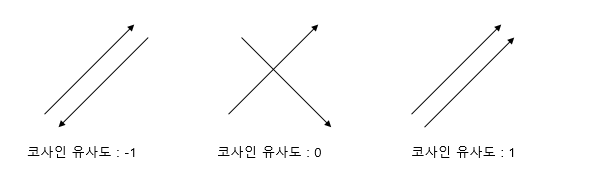




코사인 유사도 식
<img src = 'https://neo4j.com/docs/graph-algorithms/current/images/cosine-similarity.png'>

문서 단어 행렬이나 TF-IDF 행렬을 통해서 문서의 유사도를 구하는 경우에는 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 됩니다. 그렇다면 문서 단어 행렬에 대해서 코사인 유사도를 구해보는 간단한 예제를 진행해보겠습니다.

문서1 : 저는 사과 좋아요
문서2 : 저는 바나나 좋아요
문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

위의 세 문서에 대해서 문서 단어 행렬을 만들면 이와 같습니다.

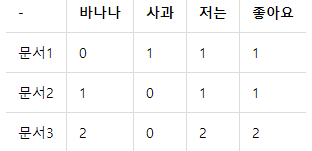

In [ ]:
#numpy를 사용하여서 코사인 유사도를 구함
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [ ]:
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

In [ ]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

눈여겨볼만한 점은 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다는 점과 문서2와 문서3의 코사인 유사도가 1이 나온다는 것입니다. 앞서 1은 두 벡터의 방향이 완전히 동일한 경우에 1이 나오며, 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다고 언급한 바 있습니다.

문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐입니다. 다시 말해 한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이라는 것입니다. 이것이 시사하는 점은 무엇일까요? 코사인 유사도를 사용하지 않는다고 가정하였을 때, 문서 A에 대해서 모든 문서와의 유사도를 구한다고 가정해봅시다. 다른 문서들과 문서 B나 거의 동일한 패턴을 가지는 문서임에도 문서 B가 단순히 다른 문서들보다 원문 길이가 긴 문서라는 이유로 (단어의 빈도수가 일정하게 더 높아질 때) 다른 문서들보다 유사도가 더 높게 나온다면 이는 우리가 원하는 결과가 아닙니다. 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와줍니다

문서 유사도 측정 예제

In [ ]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

In [ ]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환.
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

# 여러가지 유사도 기법

1. 유클리디 거리(Euclidean distnace)

-다차원 공간에서 두개의 점 $p$와 $q$가 각각 $p=(p_1,p_2,p_3,\cdots,p_n)$과 $q=(q_1,q_2,q_3,...,q_n)$의 좌표를 가질 때 두 점 사이의 거리를 계산하는 유클리드 거리 공식은 다음과 같습니다.


<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/1200px-Euclidean_distance_2d.svg.png'>

2. 자카드 유사도(Jaccard similarity)


A와 B 두개의 집합이 있다고 합시다. 이때 교집합은 두 개의 집합에서 공통으로 가지고 있는 원소들의 집합을 말합니다. 즉, 합집합에서 교집합의 비율을 구한다면 두 집합 A와 B의 유사도를 구할 수 있다는 것이 자카드 유사도(jaccard similarity)의 아이디어입니다. 자카드 유사도는 0과 1사이의 값을 가지며, 만약 두 집합이 동일하다면 1의 값을 가지고, 두 집합의 공통 원소가 없다면 0의 값을 갖습니다. 자카드 유사도를 구하는 함수를 $J$라고 하였을 때, 자카드 유사도 함수 J는 아래와 같습니다.

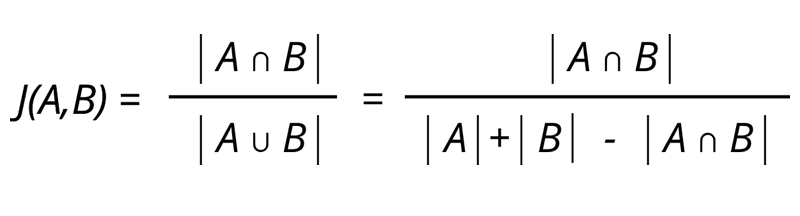

두 개의 비교할 문서를 각각 doc1, doc2라고 했을 때 doc1과 doc2의 문서의 유사도를 구하기 위한 자카드 유사도는 이와 같습니다.

$J(doc_1,doc_2) = {\dfrac{doc_1 {\cap} doc_2}{doc_1 \cup doc_2}}$

In [ ]:
# 다음과 같은 두 개의 문서가 있습니다.
# 두 문서 모두에서 등장한 단어는 apple과 banana 2개.
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화를 수행합니다.
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

# 토큰화 결과 출력
print(tokenized_doc1)
print(tokenized_doc2)

In [ ]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print(union)

문서1과 문서2의 합집합의 단어의 총 개수는 12개인 것을 확인할 수 있습니다. 그렇다면, 문서1과 문서2의 교집합을 구해보겠습니다. 즉, 문서1과 문서2에서 둘 다 등장한 단어를 구하게 됩니다.

In [ ]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print(intersection)

문서1과 문서2에서 둘 다 등장한 단어는 banana와 apple 총 2개입니다. 이제 교집합의 수를 합집합의 수로 나누면 자카드 유사도가 계산됩니다.

In [ ]:
print(len(intersection)/len(union)) # 2를 12로 나눔.|

# 레벤슈타인 거리(Levenshtein distance)
- 레벤슈타인 거리는 문자열이 얼마나 비슷한 지를 나타내는 것으로 편집 거리라고 부름. 비슷한 어구 검색,  DNA  배열의 유사성 판단 등 다양한 분야에서 활용 됨.

- 편집할 때 몇번의 문자열 조작이 필요한지를 계산해 편집거리를 구함.

참고 :https://too-march.tistory.com/20


In [ ]:
#레벤슈타인 거리 구하기
def cal_distnace(a,b):
  #레벤슈타인 거리 구하기
  if a==b: return 0 #문자열이 동일하면 레벤슈타인 거리는 0
  a_len = len(a)
  b_len = len(b)
  if a=="": return b_len #문자열 a가 공집합인 경우 레벤슈타인 거리는 b_len 만큼
  if b=="": return a_len # 문자열 b가 공집합인 경우 레벤슈타인 거리는 a_len 만큼

  #2차원 표(a_len+1,b_len+1) 준비하기 -> 비교를 공집합부터 시작하기 때문에 '문자열 길이+1'크기의 표를 준비
  matrix = [ [] for i in range(a_len+1)]
  for i in range(a_len+1): #0으로 초기화
    matrix[i] = [0 for j in range(b_len+1)]

  #0일 때 초깃값을 설정, 첫번째 행, 첫번째 열을 문자열 길이로 초기화
  for i in range(a_len+1):
    matrix[i][0] = i
  for j in range(b_len+1):
    matrix[0][j] = j

  #표를 채우는 작업
    for i in range(1,a_len+1):
     ac = a[i-1] #비교할 문자 세팅
     for j in range(1,b_len+1):
       bc  = b[j-1] #비교할 문자 세팅
       cost =0 if (ac==bc) else 1  #비교하는 문자가 같으면 cost가 0, 다르면 1
       matrix[i][j] = min([
                           matrix[i-1][j]+1, #문자 삽입
                           matrix[i][j-1], #문자 제거
                           matrix[i-1][j-1]+cost #문자 변경
                           ])
  return matrix[a_len][b_len]


In [ ]:
#'가나다라'와 '가마바라'의 거리
print(cal_distnace('가나다라','가마바라'))

In [ ]:
#실행 예
samples = ['신촌역','신천군','신천역','신발','마곡역']
base = samples[0]
r = sorted(samples, key = lambda n:cal_distnace(base,n))
for n in r:
  print(cal_distnace(base,n),n)

프로그램 동작 과정을 살펴보자.
1. 레벤슈타인 거리를 구하기 위해 2차원의 표를 만든다.
2. 첫행,첫열은 문자열의 길이로 초기화해준다.
3. 표에서 빨간 부분을 채울 때,

노랑+1 : 문자 삽입

초록 +cost : 문자 변경,  cost값은 비교하는 문자가 같으면 0 아니면 1이다.

파랑+1 : 문자 삭제

이 3가지 값 중에서 최솟값이 빨간 부분에 들어가는 것.

이 경우에는 최솟값이 0이다. 초록 부분이 0이고, cost값은 비교하는 문자가 둘 다 '가'로 동일하게 때문에 0이다.

따라서 빨간 부분은 0이다.

이렇게 계속 값을 채워나가서 마지막열, 마지막 행 부분인 회색 부분이 최종적인 레벤슈타인 거리가 된다.


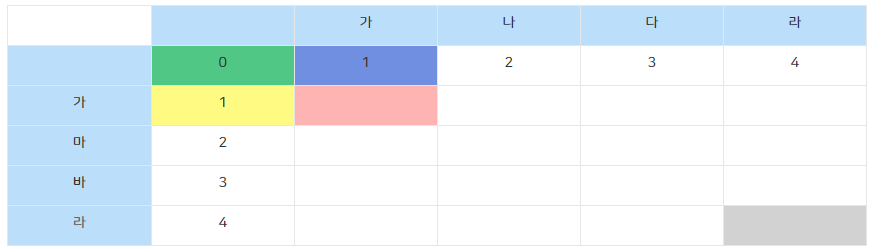

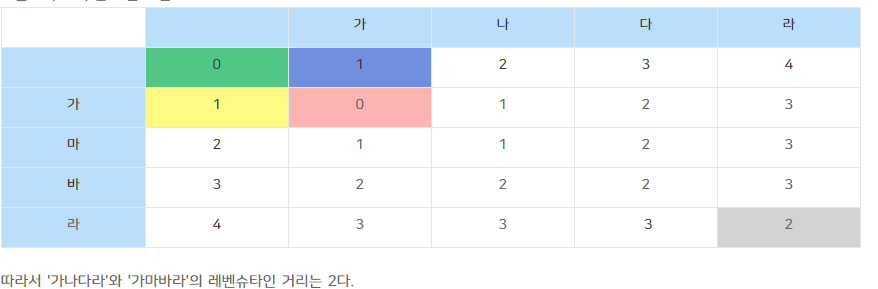

In [ ]:
edit_distance('relate','relation')

# Opinion Review 데이터 셋을 이용한 문서 유사도 측정

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
import pandas as pd
import glob ,os
pd.set_option('display.max_colwidth', 1000)  # 1000 자로 column 크기 키우기

path = r'/content/drive/MyDrive/OpinosisDataset1.0/topics'
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합,
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')

    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

In [ ]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

#네이버 영화리뷰 감성 분석

In [ ]:
!pip install konlpy

In [ ]:
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt -O ratings_train.txt
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt -O ratings_test.txt

In [ ]:
import pandas as pd

train_df = pd.read_csv('./ratings_train.txt', sep='\t')
train_df.head(3)

In [ ]:
train_df['label'].value_counts( )

In [ ]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('./ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

In [ ]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [ ]:
# Logistic Regression 을 이용하여 감성 분석 Classification 수행.
lg_clf = LogisticRegression(random_state=0)

# Parameter C 최적화를 위해 GridSearchCV 를 이용.
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

In [ ]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))

#kaggle Mercari Price Suggestion Challenge(https://www.kaggle.com/c/mercari-price-suggestion-challenge)

-아래와 같은 피쳐들을 기반으로 제품가격을 예측하는 회귀 모델을 생성

### Feature

- train_id : 데이터_id
- name : 제품명
- category_name : 카테고리 명
- brand_name : 브랜드 이름
- shipping : 배송비 무료 여부.
- item_description : 제품에 대한 설명

### Target
- Price : 제품 가격



텍스트 칼럼들을 피쳐 벡터화 후 나머지 피쳐들과 결합하여 학습/테스트용 피쳐 데이터 셋을 생성

어떻게 효율적으로 텍스트들을 효율적으로 추출하고 벡터화 할것인가에 따라 예측 성능 개선 가능.

데이터 전처리

In [ ]:

from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pandas as pd

mercari_df= pd.read_csv('/content/drive/MyDrive/Mercari Price/train.tsv',sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

In [ ]:
print(mercari_df.info())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df,kde=False)

In [ ]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df,kde=False)

In [ ]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

In [ ]:
print('Shipping 값 유형:\n',mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n',mercari_df['item_condition_id'].value_counts())

In [ ]:
boolean_cond= mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

category name이 대/중/소 와 같이 '/' 문자열 기반으로 되어 있음. 이를 개별 컬럼들로 재 생성

In [ ]:
# apply lambda에서 호출되는 대,중,소 분할 함수 생성, 대,중,소 값을 리스트 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null' , 'Other_Null' , 'Other_Null']
# 위의 split_cat( )을 apply lambda에서 호출하여 대,중,소 컬럼을 mercari_df에 생성.
mercari_df['category_list'] = mercari_df['category_name'].apply(lambda x: split_cat(x))
mercari_df['category_list'].head()

In [ ]:
mercari_df['cat_dae'] = mercari_df['category_list'].apply(lambda x:x[0])
mercari_df['cat_jung'] = mercari_df['category_list'].apply(lambda x:x[1])
mercari_df['cat_so'] = mercari_df['category_list'].apply(lambda x:x[2])

mercari_df.drop('category_list',axis = 1, inplace = True)

In [ ]:
mercari_df[['cat_dae','cat_jung','cat_so']].head()

In [ ]:
# apply lambda에서 호출되는 대,중,소 분할 함수 생성, 대,중,소 값을 리스트 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null' , 'Other_Null' , 'Other_Null']

# 위의 split_cat( )을 apply lambda에서 호출하여 대,중,소 컬럼을 mercari_df에 생성.
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
                        zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 갯수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 갯수 :', mercari_df['cat_jung'].nunique())
print('소분류 갯수 :', mercari_df['cat_so'].nunique())

In [ ]:

mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

# 각 컬럼별로 Null값 건수 확인. 모두 0가 나와야 합니다.
mercari_df.isnull().sum()

피처 인코딩과 피처 벡터화

brand name 과 name의 종류 확인

In [ ]:
print('brand name 의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

In [ ]:
print('name 의 종류 갯수 :', mercari_df['name'].nunique())
print('name sample 7건 : \n', mercari_df['name'][:7])

item_descirption의 문자열 개수 확인

In [ ]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 개수
print('item_description 평균 문자열 개수:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

In [ ]:
# name 속성에 대한 feature vectorization 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description 에 대한 feature vectorization 변환
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range= (1,3) , stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:',X_name.shape)
print('item_description vectorization shape:',X_descp.shape)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name= LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping= LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae= lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [ ]:

print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

In [ ]:
from  scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id,
            X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# 사이파이 sparse 모듈의 hstack 함수를 이용하여 앞에서 인코딩과 Vectorization을 수행한 데이터 셋을 모두 결합.
X_features_sparse= hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 셋이 메모리를 많이 차지하므로 사용 용도가 끝났으면 바로 메모리에서 삭제.
del X_features_sparse
gc.collect()

릿지 회귀 모델 구축 및 평가

In [ ]:
def rmsle(y , y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds):

    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요.
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)

    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [ ]:
import gc
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    # scipy.sparse 모듈의 hstack 을 이용하여 sparse matrix 결합
    X= hstack(matrix_list).tocsr()

    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'],
                                                      test_size=0.2, random_state=156)

    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)

    del X , X_train , X_test , y_train
    gc.collect()

    return preds , y_test

In [ ]:
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model ,matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test , linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model , matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds , y_test = model_train_predict(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

In [ ]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test , preds))